# Stochastic Differential Equations, Quantum Phase Space, and Julia

$$
\def\julia{\texttt{julia}}
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
$$

Dr. Ashton Bradley
<br>
ashton.bradley@otago.ac.nz
<br>
http://amoqt.otago.ac.nz

# Intro to julia

This laboratory will serve as an introduction to julia, and provide some essential background for stochastic processes.  

## Workshop 1 (1.5 hours): $\julia$ in a nutshell
Getting started in $\julia$: the basics

- Familiarity with $\julia$ computing environments: REPL, Jupyter, Juno
- Variables, functions 
- Using packages and plotting
- How does $\julia$ solve the two-language problem?

References

- [julialang.org](https://julialang.org)
- [juliaobserver](https://juliaobserver.com)
- _Julia: A Fresh Approach to Numerical Computing_, Jeff Bezanson, Alan Edelman, Stefan Karpinski and Viral B. Shah [SIAM Review, __59__, 65–98 (2017)](http://julialang.org/publications/julia-fresh-approach-BEKS.pdf)
- [Fun and sometimes useful julia packages](http://amoqt.otago.ac.nz/resources/juliajam)

# Motivation: the two-language problem
Why another language? 

- Compiled languages
    - Fast execution
    - Slow to read/write/debug
    - Tend to get isolated from latest conceptual developments 
- Interpreted languages 
    - Slow exection
    - Easy to read/write/debug
    - Not well suited for high performance computing
- This is a ___major___ issue in technical computing. 
- This conflict motivated the development of $\julia$ at MIT (1.0 released 2018). 
- [next big thing?](https://www.techrepublic.com/article/is-julia-the-next-big-programming-language-mit-thinks-so-as-version-1-0-lands/)
- [Julia joined the "petaflop club" in 2017](https://www.hpcwire.com/off-the-wire/julia-joins-petaflop-club/), the only high level scripting language ever to do so.

## Julia microbenchmarks
[https://julialang.org/benchmarks/](https://julialang.org/benchmarks/)

<img src="media/juliabench.png" width="600">

<img src="media/packages.png" width="600">

## Julia observer

An up to date package listing is provided at [juliaobserver.com](https://juliaobserver.com/packages)

## Language 
Julia is powered by several unique language innovations that developers love, and I think you will too once you get to know a bit more about them:

- Multiple dispatch: methods are not owned by classes.
- Duck typing: you can define your own data types by their properties; they translate across all of julia 
- Different julia modules can call each other without any loss of performance

Coming from a different language, you may find a list of [noteworthy differences to other languages](https://docs.julialang.org/en/v0.7.0/manual/noteworthy-differences/)  useful.

# $\julia$ environments

## Read, Evaluate, Print, Loop (REPL)

<img src="media/repl.png" width="500">

## Package manager

How to access Pkg mode in the REPL
```julia
julia> ]
```

To add a package

```julia
(1.0) pkg> add IJulia 
```

Note that REPL commands are just $\julia$ commands, so julia REPL and jupyter are identical, except that the Pkg mode can't be accessed in jupyter.

In [8]:
#how to access Pkg commands in jupyter
using Pkg
pkg"status" 

    Status `~/.julia/environments/v1.0/Project.toml`
  [28f2ccd6] ApproxFun v0.10.3
  [c52e3926] Atom v0.7.12
  [462a19be] Barycentric v0.1.0 [`~/.julia/dev/Barycentric`]
  [6e4b80f9] BenchmarkTools v0.4.1
  [12aac903] BinaryBuilder v0.1.4
  [5ae59095] Colors v0.9.5
  [38ac1a67] ComplexPhasePortrait v0.0.1+ #master (https://github.com/JuliaHolomorphic/ComplexPhasePortrait.jl.git)
  [8f4d0f93] Conda v1.1.1
  [0c46a032] DifferentialEquations v5.3.1
  [31c24e10] Distributions v0.16.4
  [fa6b7ba4] DualNumbers v0.6.1
  [7a1cc6ca] FFTW v0.2.4
  [442a2c76] FastGaussQuadrature v0.3.2
  [057dd010] FastTransforms v0.4.2
  [5789e2e9] FileIO v1.0.5
  [add2ef01] GDAL v0.2.0
  [28b8d3ca] GR v0.37.0
  [92c85e6c] GSL v0.4.0
  [4d00f742] GeometryTypes v0.7.2
  [7073ff75] IJulia v1.15.2
  [c601a237] Interact v0.9.0
  [a98d9a8b] Interpolations v0.11.1
  [d1acc4aa] IntervalArithmetic v0.15.1
  [d2bf35a9] IntervalRootFinding v0.4.0
  [4138dd39] JLD v0.9.1
  [033835bb] JLD2 v0.1.2
  [e5e0dc1b] Juno v0.5.4
 

To load a package
```julia
julia> using IJulia
```

`IJulia` provides the jupyter environment for julia. 
    
To launch jupyter, enter this command in the REPL:
```julia
julia> notebook()
```

You should now have access to the lectures as jupyter notebooks (no? let me know).

# Jupyter
Web browser front end calls a $\julia$ kernel, evaluates, returns result; quite low overhead.

In [15]:
using Plots
# set defaults for GR backend
gr(titlefontsize=12,grid=false,legend=false,size=(600,200))

Plots.GRBackend()

In [9]:
# let's add one useful function (more on this later)
linspace(a,b,n) = LinRange(a,b,n) |> collect

linspace (generic function with 1 method)

In [11]:
x = linspace(0,10,500);

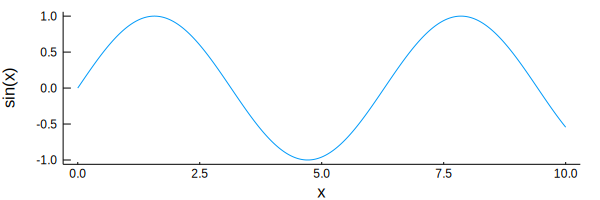

In [20]:
#first plot will take a few seconds
plot(x,sin.(x)) 
xlabel!("x");ylabel!("sin(x)")

- Dot-calls: extension of Matlab's local array operation syntax.
- `xlabel!()`: `!` at the end of the function name is a julia convention that declares: "modifies the input", also referred to as a _mutating function_; here the input is the current plot which doesn't neet to be declared. 

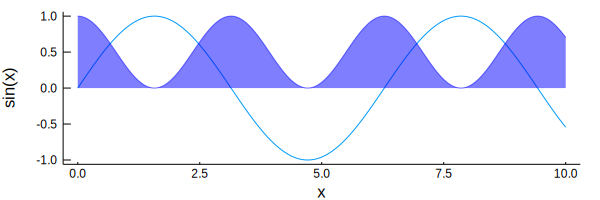

In [22]:
plot!(x,cos.(x).^2,fillrange=[zero(x) cos.(x).^2],
    c=:blue,alpha=0.3)

# line continuation: just break off, mid-command

In [23]:
z=2; println(z) #more than one command on same line

2


In [28]:
println("hello world, this is julia. It's a bit like Matlab, Python, R, C, Fortran, Ruby, Haskell, ...
    but not really like any other language")

hello world, this is julia. It's a bit like Matlab, Python, R, C, Fortran, Ruby, Haskell, ...
    but not really like any other language


# Calling other languages

In [29]:
println("from julia you can also easily use  libraries from 
    Python, R, C/Fortran, C++, and Java. 
    Did I mention that I like ", pi ," ?")

from julia you can also easily use  libraries from 
    Python, R, C/Fortran, C++, and Java. 
    Did I mention that I like π = 3.1415926535897... ?


For example, a number of special functions can be called via the C library GSL ([GNU Scientific Library](https://github.com/JuliaMath/GSL.jl)):

In [30]:
#load some wrapper functions that call GSL
using GSL

In [31]:
sf_bessel_J0(0.3)

0.9776262465382961

A native $\julia$ implementation of many special functions can be found in [SpecialFunctions.jl](https://github.com/JuliaMath/SpecialFunctions.jl)

In [32]:
using SpecialFunctions

In [33]:
zeta(3) # returns a Float64

1.2020569031595951

In [34]:
zeta(2.0 + 3.0im) # returns a complex float

0.7980219851462758 - 0.11374430805293854im

In [35]:
typeof(ans)

Complex{Float64}

You can also use [PyCall.jl](https://github.com/JuliaPy/PyCall.jl) to call `python` functions with low overhead:

In [36]:
using PyCall

In [37]:
@pyimport math
math.sin(math.pi / 4) - sin(pi / 4)  # returns 0.0

0.0

- A nice feature of jupyter is that we can enter text, latex, and code, all in one easily shareable document. 
- Open Science! Yay! There are [many other kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels) available for jupyter.
- The importance of such an open science standard is highlighted by major scientific discovery of LIGO: the black hole merger data, simulations, and analysis were provided as [jupyter notebooks](https://blog.jupyter.org/congratulations-to-the-ligo-and-virgo-collaborations-from-project-jupyter-5923247be019).

- To shift from ___code mode___ to ___markdown mode___, press `ESC`, then `y`.

- You can now type text with simple [markdown](https://www.markdownguide.org/cheat-sheet/) syntax, LaTeX in-line $\langle x\rangle=\pi$, and full line equations:
$$i\hbar\frac{\partial\psi}{\partial t}=\hat{H}\psi,$$
add [links](http://www.google.com), and drag in images. Not all of latex is supported, but for example, you can

\begin{align}
\partial_t\psi&=L\psi\tag{some equation}\\
-\nabla^2\psi&=\lambda\psi\tag{some other}
\end{align}

- To go back to code mode, press `ESC`, then `m`; default is code mode. 

- A full list of keyboard shortcuts can be found under the help menu above.

## Cool things you can do in julia

In [38]:
😸=35.6 #unicode inputs are allowed varables!

35.6

In [39]:
ψ=25 #LaTeX tab completion: type \psi<tab> to get the greek letter ψ.

25

In [40]:
ħ = 1.0545718e-34

1.0545718e-34

In [41]:
#variable precision 
BigFloat(pi,2000)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405131996

In [48]:
exp(im*BigFloat(pi,2000))+1

0.0 + 4.582363384086222409168621731742190695845080541202039763581730143804801597402798e-603im

In [49]:
typeof(BigFloat(pi))

BigFloat

Here "BigFloat" is both 

- a method to perform type conversion, and 
- the name of a data type. 

These two things are defined separately.

In [53]:
mypi = BigFloat(pi,64)

3.14159265358979323851

In [54]:
typeof(mypi) <: AbstractFloat

true

There is an abstract type system that you can extend as you like.

In [55]:
?BigFloat 

search: BigFloat



```
BigFloat <: AbstractFloat
```

Arbitrary precision floating point number type.

---

```
BigFloat(x)
```

Create an arbitrary precision floating point number. `x` may be an [`Integer`](@ref), a [`Float64`](@ref) or a [`BigInt`](@ref). The usual mathematical operators are defined for this type, and results are promoted to a [`BigFloat`](@ref).

Note that because decimal literals are converted to floating point numbers when parsed, `BigFloat(2.1)` may not yield what you expect. You may instead prefer to initialize constants from strings via [`parse`](@ref), or using the `big` string literal.

```jldoctest
julia> BigFloat(2.1)
2.100000000000000088817841970012523233890533447265625

julia> big"2.1"
2.099999999999999999999999999999999999999999999999999999999999999999999999999986
```

---

```
BigFloat(x, prec::Int)
```

Create a representation of `x` as a [`BigFloat`](@ref) with precision `prec`.

---

```
BigFloat(x, prec::Int, rounding::RoundingMode)
```

Create a representation of `x` as a [`BigFloat`](@ref) with precision `prec` and [`Rounding Mode`](@ref Base.Rounding.RoundingMode) `rounding`.

---

```
BigFloat(x, rounding::RoundingMode)
```

Create a representation of `x` as a [`BigFloat`](@ref) with the current global precision and [`Rounding Mode`](@ref Base.Rounding.RoundingMode) `rounding`.

---

```
BigFloat(x::String)
```

Create a representation of the string `x` as a [`BigFloat`](@ref).


## Arrays and functions

In [56]:
x = randn(6)

6-element Array{Float64,1}:
  0.5824576963966464 
 -0.4689332155931303 
  1.3627819361024267 
 -0.428691417325343  
  0.34891170490766915
 -1.717156121705856  

In [57]:
x[2] # accessing an element of an array: [] vs ()

-0.4689332155931303

In [58]:
x^2

MethodError: MethodError: no method matching ^(::Array{Float64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:795
  ^(!Matched::Missing, ::Integer) at missing.jl:120
  ^(!Matched::Missing, ::Number) at missing.jl:93
  ...

In [59]:
x.^2 # a dot-call: element-wise operations

6-element Array{Float64,1}:
 0.33925696809168787
 0.2198983606865132 
 1.8571746053670786 
 0.1837763312884114 
 0.1217393778215764 
 2.948625146311896  

In [60]:
# let's define a function
f(x) = x^3-x+pi

f (generic function with 1 method)

In [61]:
f.(x)

6-element Array{Float64,1}:
  2.7567377893143417 
  3.507408223802539  
  4.3097347218697735 
  3.491500734984255  
  2.835157242552249  
 -0.20450094530964869

same result without passing to a function:

In [62]:
x.^3 .-x.+pi #manually dot all operations that will act on arrays element by element

6-element Array{Float64,1}:
  2.7567377893143417 
  3.507408223802539  
  4.3097347218697735 
  3.491500734984255  
  2.835157242552249  
 -0.20450094530964869

In [64]:
@. x^3-x+pi # the macro @. will dot-the-lot.

6-element Array{Float64,1}:
  2.7567377893143417 
  3.507408223802539  
  4.3097347218697735 
  3.491500734984255  
  2.835157242552249  
 -0.20450094530964869

By dotting the function call, `f.(x)`, the dot is applied to all operations.

### Two-dimensional example

In [65]:
f2(x,y) = x^3-y+pi

f2 (generic function with 1 method)

In [66]:
y = x

6-element Array{Float64,1}:
  0.5824576963966464 
 -0.4689332155931303 
  1.3627819361024267 
 -0.428691417325343  
  0.34891170490766915
 -1.717156121705856  

In [67]:
f2(x,y) #(oops!)

MethodError: MethodError: no method matching ^(::Array{Float64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:795
  ^(!Matched::Missing, ::Integer) at missing.jl:120
  ^(!Matched::Missing, ::Number) at missing.jl:93
  ...

In [68]:
f2.(x,y) #acts on each element of column vectors x, y

6-element Array{Float64,1}:
  2.7567377893143417 
  3.507408223802539  
  4.3097347218697735 
  3.491500734984255  
  2.835157242552249  
 -0.20450094530964869

In [69]:
f2.(x,y') #broadcasts each element of x along y, and of y along x

6×6 Array{Float64,2}:
  2.75674   3.80813   1.97641   3.76789   2.99028   5.05635 
  2.45602   3.50741   1.67569   3.46717   2.68956   4.75563 
  5.09006   6.14145   4.30973   6.10121   5.3236    7.38967 
  2.48035   3.53174   1.70003   3.4915    2.7139    4.77997 
  2.60161   3.653     1.82129   3.61276   2.83516   4.90123 
 -2.50411  -1.45272  -3.28444  -1.49297  -2.27057  -0.204501

This is a beautiful feature of $\julia$ due to Steven Johnson (MIT, of FFTW fame). It goes quite deeply into the language, allowing you to create "fused kernels", compiling many dot-calls together into a single highly efficient operation acting locally in memory. 

# Memory and function calls
It is worth emphasizing at this point that one of the great advantages of $\julia$ is that it allows low-level access to memory, giving pathways to overcome one of the main bottleknecks of interpreted languages. A major deficiency  of other high-level languages such as Matlab is that function calls are slowed down by temporary memory allocations. 

## Writing in-place
If we want to do a calculation and write the output in-place in memory

In [70]:
using BenchmarkTools 

In [71]:
x=randn(10000);

In [72]:
#let's pre-allocate somwhere to write the output
z = f2.(x,x');

In [73]:
# do many calls, and return average execution time, and memory allocations
@btime z = f2.(x,x');

  542.901 ms (5 allocations: 762.94 MiB)


So far this is an allocating call, requiring a temporary allocation for the result, before finally writing the result to `z`. 

Now let's write the result directly to memory, the $\julia$ way:

In [74]:
@btime z .= f2.(x,x');

  97.225 ms (3 allocations: 64 bytes)


The calculation is basically allocation free, with a significant speed up. In ambitious physics simulations, this can translate into much larger gains in execution speed.

This is probably a good time to point out that 

- In $\julia$ there is no speed advantage to "vectorizing" your code. 
- If you prefer to write your own loops, you will get native C speed in $\julia$.
- By using dot-calls, you will get you very close to the same speed, while maintaining the clarity of vectorized code. 

# Loops, iterators

In [75]:
for j=1:10
    println("j is $j")
end

j is 1
j is 2
j is 3
j is 4
j is 5
j is 6
j is 7
j is 8
j is 9
j is 10


In [76]:
# an interator
n = 1:30

1:30

In [77]:
typeof(n) #not an Array

UnitRange{Int64}

In [100]:
# a simple function with type conversion using redirection
sumton(n) = n*(n+1)/2 |> Int

sumton (generic function with 1 method)

In [103]:
sumton(3)

6

In [104]:
sumton(3.1)

InexactError: InexactError: Int64(Int64, 6.3549999999999995)

In [105]:
# a for loop with string inerpolation
for j in n
    println("sum up to j: j = $j; julia gives $(sum(n[1:j])); Euler gives $(sumton(j))")
end

sum up to j: j = 1; julia gives 1; Euler gives 1
sum up to j: j = 2; julia gives 3; Euler gives 3
sum up to j: j = 3; julia gives 6; Euler gives 6
sum up to j: j = 4; julia gives 10; Euler gives 10
sum up to j: j = 5; julia gives 15; Euler gives 15
sum up to j: j = 6; julia gives 21; Euler gives 21
sum up to j: j = 7; julia gives 28; Euler gives 28
sum up to j: j = 8; julia gives 36; Euler gives 36
sum up to j: j = 9; julia gives 45; Euler gives 45
sum up to j: j = 10; julia gives 55; Euler gives 55
sum up to j: j = 11; julia gives 66; Euler gives 66
sum up to j: j = 12; julia gives 78; Euler gives 78
sum up to j: j = 13; julia gives 91; Euler gives 91
sum up to j: j = 14; julia gives 105; Euler gives 105
sum up to j: j = 15; julia gives 120; Euler gives 120
sum up to j: j = 16; julia gives 136; Euler gives 136
sum up to j: j = 17; julia gives 153; Euler gives 153
sum up to j: j = 18; julia gives 171; Euler gives 171
sum up to j: j = 19; julia gives 190; Euler gives 190
sum up to j: j 

## Geometric series
Let's make a little function to evaluate the geometric series up to a given polynomial degree $N-1$.

__Exercise:__ Write a function to sum `N` terms in the geometric series, for input `x`.

In [106]:
# write a function to add up the terms
function geometric(x,N)
    result = #your code to sum from x^0 up to x^(N-1)
    return result
end

geometric (generic function with 1 method)

(note we haven't used any type annotations!)

and compare with the analytical result:
<div class="alert alert-block alert-warning"><font color=blue>
$$S_N=\sum_{k=0}^{N-1}x^k=1+x+x^2+x^3\dots+x^{N-1}=\frac{1-x^N}{1-x}$$
</font></div>

In [107]:
geomExact(x,N)=(1-x^N)/(1-x)

geomExact (generic function with 1 method)

A note on compilation and evaluation
 - first call with particular data type triggers $\julia$ to compile fast code.
 - all later calls with the same type will get fast execution

Let's time the first call:

In [108]:
@time geometric(.1,1000) #compile

  0.010237 seconds (14.05 k allocations: 748.988 KiB)


1.1111111111111112

In [109]:
@time geometric(.1,1000) # ~C speed!

  0.000028 seconds (5 allocations: 176 bytes)


1.1111111111111112

In [110]:
@btime geometric(.1,1000) # a more reliable measure of timing

  21.060 μs (0 allocations: 0 bytes)


1.1111111111111112

Our two functions should achieve the same result to numerical precision

In [111]:
x = 0.97
N = 100
geometric(x,N),geomExact(x,N)

(31.74824973581979, 31.748249735819783)

In this example, "numerical precision" means about 1e-14 due to accumulated floating point error:

In [112]:
isapprox(geometric(x,N),geomExact(x,N),atol=1e-14)

true

Notice we can dot some or all of the arguments:

In [113]:
geometric.([0.1; 0.2; 0.3],100) 

3-element Array{Float64,1}:
 1.1111111111111112
 1.25              
 1.4285714285714288

In [114]:
geometric.(0.7,[10 20 30 100]) 

1×4 Array{Float64,2}:
 3.23917  3.33067  3.33326  3.33333

In [115]:
geometric.([0.1; 0.2; 0.7],[3 20 30 100]) 

3×4 Array{Float64,2}:
 1.11  1.11111  1.11111  1.11111
 1.24  1.25     1.25     1.25   
 2.19  3.33067  3.33326  3.33333

# Miltiple dispatch
This is really the key language feature the sets $\julia$ apart from other technical computing languages. 
- Methods are not owned by classes
- Operator overloading is ubiquitous and tied to data type
- Types can be extended at will

In [116]:
methods(*)

# 373 methods for generic function "*":
[1] *(x::Bool, z::Complex{Bool}) in Base at complex.jl:281
[2] *(x::Bool, y::Bool) in Base at bool.jl:106
[3] *(x::Bool, y::T) where T<:AbstractFloat in Base at bool.jl:118
[4] *(x::Bool, z::Complex) in Base at complex.jl:288
[5] *(x::Bool, y::AbstractIrrational) in Base at irrationals.jl:135
[6] *(a::Float16, b::Float16) in Base at float.jl:392
[7] *(x::Float32, y::Float32) in Base at float.jl:398
[8] *(x::Float64, y::Float64) in Base at float.jl:399
[9] *(z::Complex{Bool}, x::Bool) in Base at complex.jl:282
[10] *(z::Complex{Bool}, x::Real) in Base at complex.jl:300
[11] *(::Missing, ::Missing) in Base at missing.jl:92
[12] *(::Missing, ::Number) in Base at missing.jl:93
[13] *(d::Missing, x::AbstractString) in Base at missing.jl:139
[14] *(this::Base.Grisu.Float, other::Base.Grisu.Float) in Base.Grisu at grisu/float.jl:140
[15] *(c::BigInt, x::BigFloat) in Base.MPFR at mpfr.jl:353
[16] *(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt) in Base.GMP at gmp.jl:443
[17] *(a::BigInt, b::BigInt, c::BigInt, d::BigInt) in Base.GMP at gmp.jl:442
[18] *(a::BigInt, b::BigInt, c::BigInt) in Base.GMP at gmp.jl:441
[19] *(x::BigInt, y::BigInt) in Base.GMP at gmp.jl:412
[20] *(x::BigInt, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.GMP at gmp.jl:460
[21] *(x::BigInt, c::Union{Int16, Int32, Int64, Int8}) in Base.GMP at gmp.jl:462
[22] *(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat) in Base.MPFR at mpfr.jl:503
[23] *(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat) in Base.MPFR at mpfr.jl:496
[24] *(a::BigFloat, b::BigFloat, c::BigFloat) in Base.MPFR at mpfr.jl:490
[25] *(x::BigFloat, c::BigInt) in Base.MPFR at mpfr.jl:349
[26] *(x::BigFloat, y::BigFloat) in Base.MPFR at mpfr.jl:318
[27] *(x::BigFloat, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.MPFR at mpfr.jl:325
[28] *(x::BigFloat, c::Union{Int16, Int32, Int64, Int8}) in Base.MPFR at mpfr.jl:333
[29] *(x::BigFloat, c::Union{Float16, Float32, Float64}) in Base.MPFR at mpfr.jl:341
[30] *(B::BitArray{2}, J::LinearAlgebra.UniformScaling) in LinearAlgebra at /Users/osx/buildbot/slave/package_osx64/build/usr/share/julia/stdlib/v1.0/LinearAlgebra/src/uniformscaling.jl:145
[31] *(m1::Measures.Length{:mm,Float64}, m2::Measures.Length{:pct,T} where T) in Plots at /Users/abradley/.julia/packages/Plots/qh1wV/src/layouts.jl:24
[32] *(a::PyObject, b::PyObject) in PyCall at /Users/abradley/.julia/packages/PyCall/0jMpb/src/pyoperators.jl:12
[33] *(a::PyObject, b) in PyCall at /Users/abradley/.julia/packages/PyCall/0jMpb/src/pyoperators.jl:14
[34] *(y::AbstractFloat, x::Bool) in Base at bool.jl:120
[35] *(x::T, y::T) where T<:Union{Int128, UInt128} in Base at int.jl:788
[36] *(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:54
[37] *(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt) in Base.GMP at gmp.jl:461
[38] *(c::Union{Int16, Int32, Int64, Int8}, x::BigInt) in Base.GMP at gmp.jl:463
[39] *(a::Integer, b::Integer) in Base at int.jl:800
[40] *(x::Real, r::StepRangeLen{#s57,#s56,S} where S where #s56<:Base.TwicePrecision where #s57<:Real) in Base at twiceprecision.jl:479
[41] *(z::Complex, w::Complex) in Base at complex.jl:268
[42] *(z::Complex, x::Bool) in Base at complex.jl:289
[43] *(x::Real, z::Complex{Bool}) in Base at complex.jl:299
[44] *(x::Real, z::Complex) in Base at complex.jl:311
[45] *(z::Complex, x::Real) in Base at complex.jl:312
[46] *(x::Rational, y::Rational) in Base at rational.jl:259
[47] *(a::Integer, index::CartesianIndex{N}) where N in Base.IteratorsMD at multidimensional.jl:115
[48] *(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:329
[49] *(c::Union{Int16, Int32, Int64, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:337
[50] *(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:345
[51] *(x::AbstractIrrational, y::AbstractIrrational) in Base at irrationals.jl:133
[52] *(y::Real, x

In [118]:
@code_lowered 5*5 #what is high-level julia translated into?

CodeInfo(
│54 1 ─ %1 = (Base.mul_int)(x, y)
│   └──      return %1
)

In [119]:
@code_llvm 5*5 #what does the compiler produce?


; Function *
; Location: int.jl:54
define i64 @"julia_*_33648"(i64, i64) {
top:
  %2 = mul i64 %1, %0
  ret i64 %2
}


In [121]:
@code_lowered 5*2.1

CodeInfo(
│314 1 ─ %1 = (Base.promote)(x, y)
│    │   %2 = (Core._apply)(Base.:*, %1)
│    └──      return %2
)

In [122]:
@code_llvm 5*2.1


; Function *
; Location: promotion.jl:314
define double @"julia_*_39046"(i64, double) {
top:
; Function promote; {
; Location: promotion.jl:284
; Function _promote; {
; Location: promotion.jl:261
; Function convert; {
; Location: number.jl:7
; Function Type; {
; Location: float.jl:60
  %2 = sitofp i64 %0 to double
;}}}}
; Function *; {
; Location: float.jl:399
  %3 = fmul double %2, %1
;}
  ret double %3
}


In [123]:
#multiply two integers
@btime 5*5

  0.031 ns (0 allocations: 0 bytes)


25

In [124]:
#multiply a float and an integer
@btime 5*2.1

  1.886 ns (0 allocations: 0 bytes)


10.5

Is float multiplication really that much slower?

In [126]:
#multiply two floats
@btime 5.0*2.1

  0.031 ns (0 allocations: 0 bytes)


10.5

These timing comparisons and code principles apply across the enirety of $\julia$: 

<div class="alert alert-block alert-warning"><font color=blue>
You are both free to create without concern for data types, and free to optimize so that efficient code is written for you by the compiler once your code is type stable.
    </font></div>    
    
- Note 90\% of $\julia$ is written in $\julia$: the core of julia is setting up a composable type system and multiple dispatch structure for methods. All data types and methods that act on therm are build with the same core language that you are free to extend as you wish!

- This is one of the main reasons developers enjoy $\julia$. 

- For users: come for the speed, stay for the productivity!

# Array comprehension
Julia has absorbed many nice language features that have emerged in different contexts. For example the array comprehension, a nice natural language syntax for building complex arrays of arbitrary size, element by element. (a little slow to evaluate, but clear and easy to write!)

In [63]:
B = [i*j^2 for i in 1:5, j in 1:4, k in 1:3]

5×4×3 Array{Int64,3}:
[:, :, 1] =
 1   4   9  16
 2   8  18  32
 3  12  27  48
 4  16  36  64
 5  20  45  80

[:, :, 2] =
 1   4   9  16
 2   8  18  32
 3  12  27  48
 4  16  36  64
 5  20  45  80

[:, :, 3] =
 1   4   9  16
 2   8  18  32
 3  12  27  48
 4  16  36  64
 5  20  45  80

In [3]:
truthTable = [i*j for i in [true; false], j in [true; false]]

2×2 Array{Bool,2}:
  true  false
 false  false

In [5]:
⊗=kron

kron (generic function with 16 methods)

In [11]:
using LinearAlgebra

In [28]:
a = randn(3,3)
b = one(randn(2,2))

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [29]:
a⊗b

6×6 Array{Float64,2}:
 -0.869978   -0.0         0.716697   0.0       -0.658863  -0.0     
 -0.0        -0.869978    0.0        0.716697  -0.0       -0.658863
  0.0376416   0.0        -0.135138  -0.0       -1.31646   -0.0     
  0.0         0.0376416  -0.0       -0.135138  -0.0       -1.31646 
  0.349866    0.0        -1.41655   -0.0        0.662068   0.0     
  0.0         0.349866   -0.0       -1.41655    0.0        0.662068

In [30]:
b⊗a

6×6 Array{Float64,2}:
 -0.869978    0.716697  -0.658863  -0.0         0.0       -0.0     
  0.0376416  -0.135138  -1.31646    0.0        -0.0       -0.0     
  0.349866   -1.41655    0.662068   0.0        -0.0        0.0     
 -0.0         0.0       -0.0       -0.869978    0.716697  -0.658863
  0.0        -0.0       -0.0        0.0376416  -0.135138  -1.31646 
  0.0        -0.0        0.0        0.349866   -1.41655    0.662068

More introductory topics to explore:
- [Conditional evaluation; ternary operator](https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation-1)
- [Mathematical operators](https://docs.julialang.org/en/v1/base/math/#math-ops-1)

More packages to explore:
 - [DynamicalSystems](https://github.com/JuliaDynamics/DynamicalSystems.jl)
 - [QuantumOptics](https://github.com/qojulia/QuantumOptics.jl)
 - [SymPy](https://github.com/JuliaPy/SymPy.jl)
 - [PGFPlots](https://github.com/JuliaTeX/PGFPlots.jl)

 ## Juno
 - Integrated Development Environment based on the wonderful open-source editor [Atom](https://atom.io/).
 - Great once you get into writing a sizeable amount of code.
 - Line by line evaluation, plotting, workspace, documentation browser, GitHub integration, etc. 

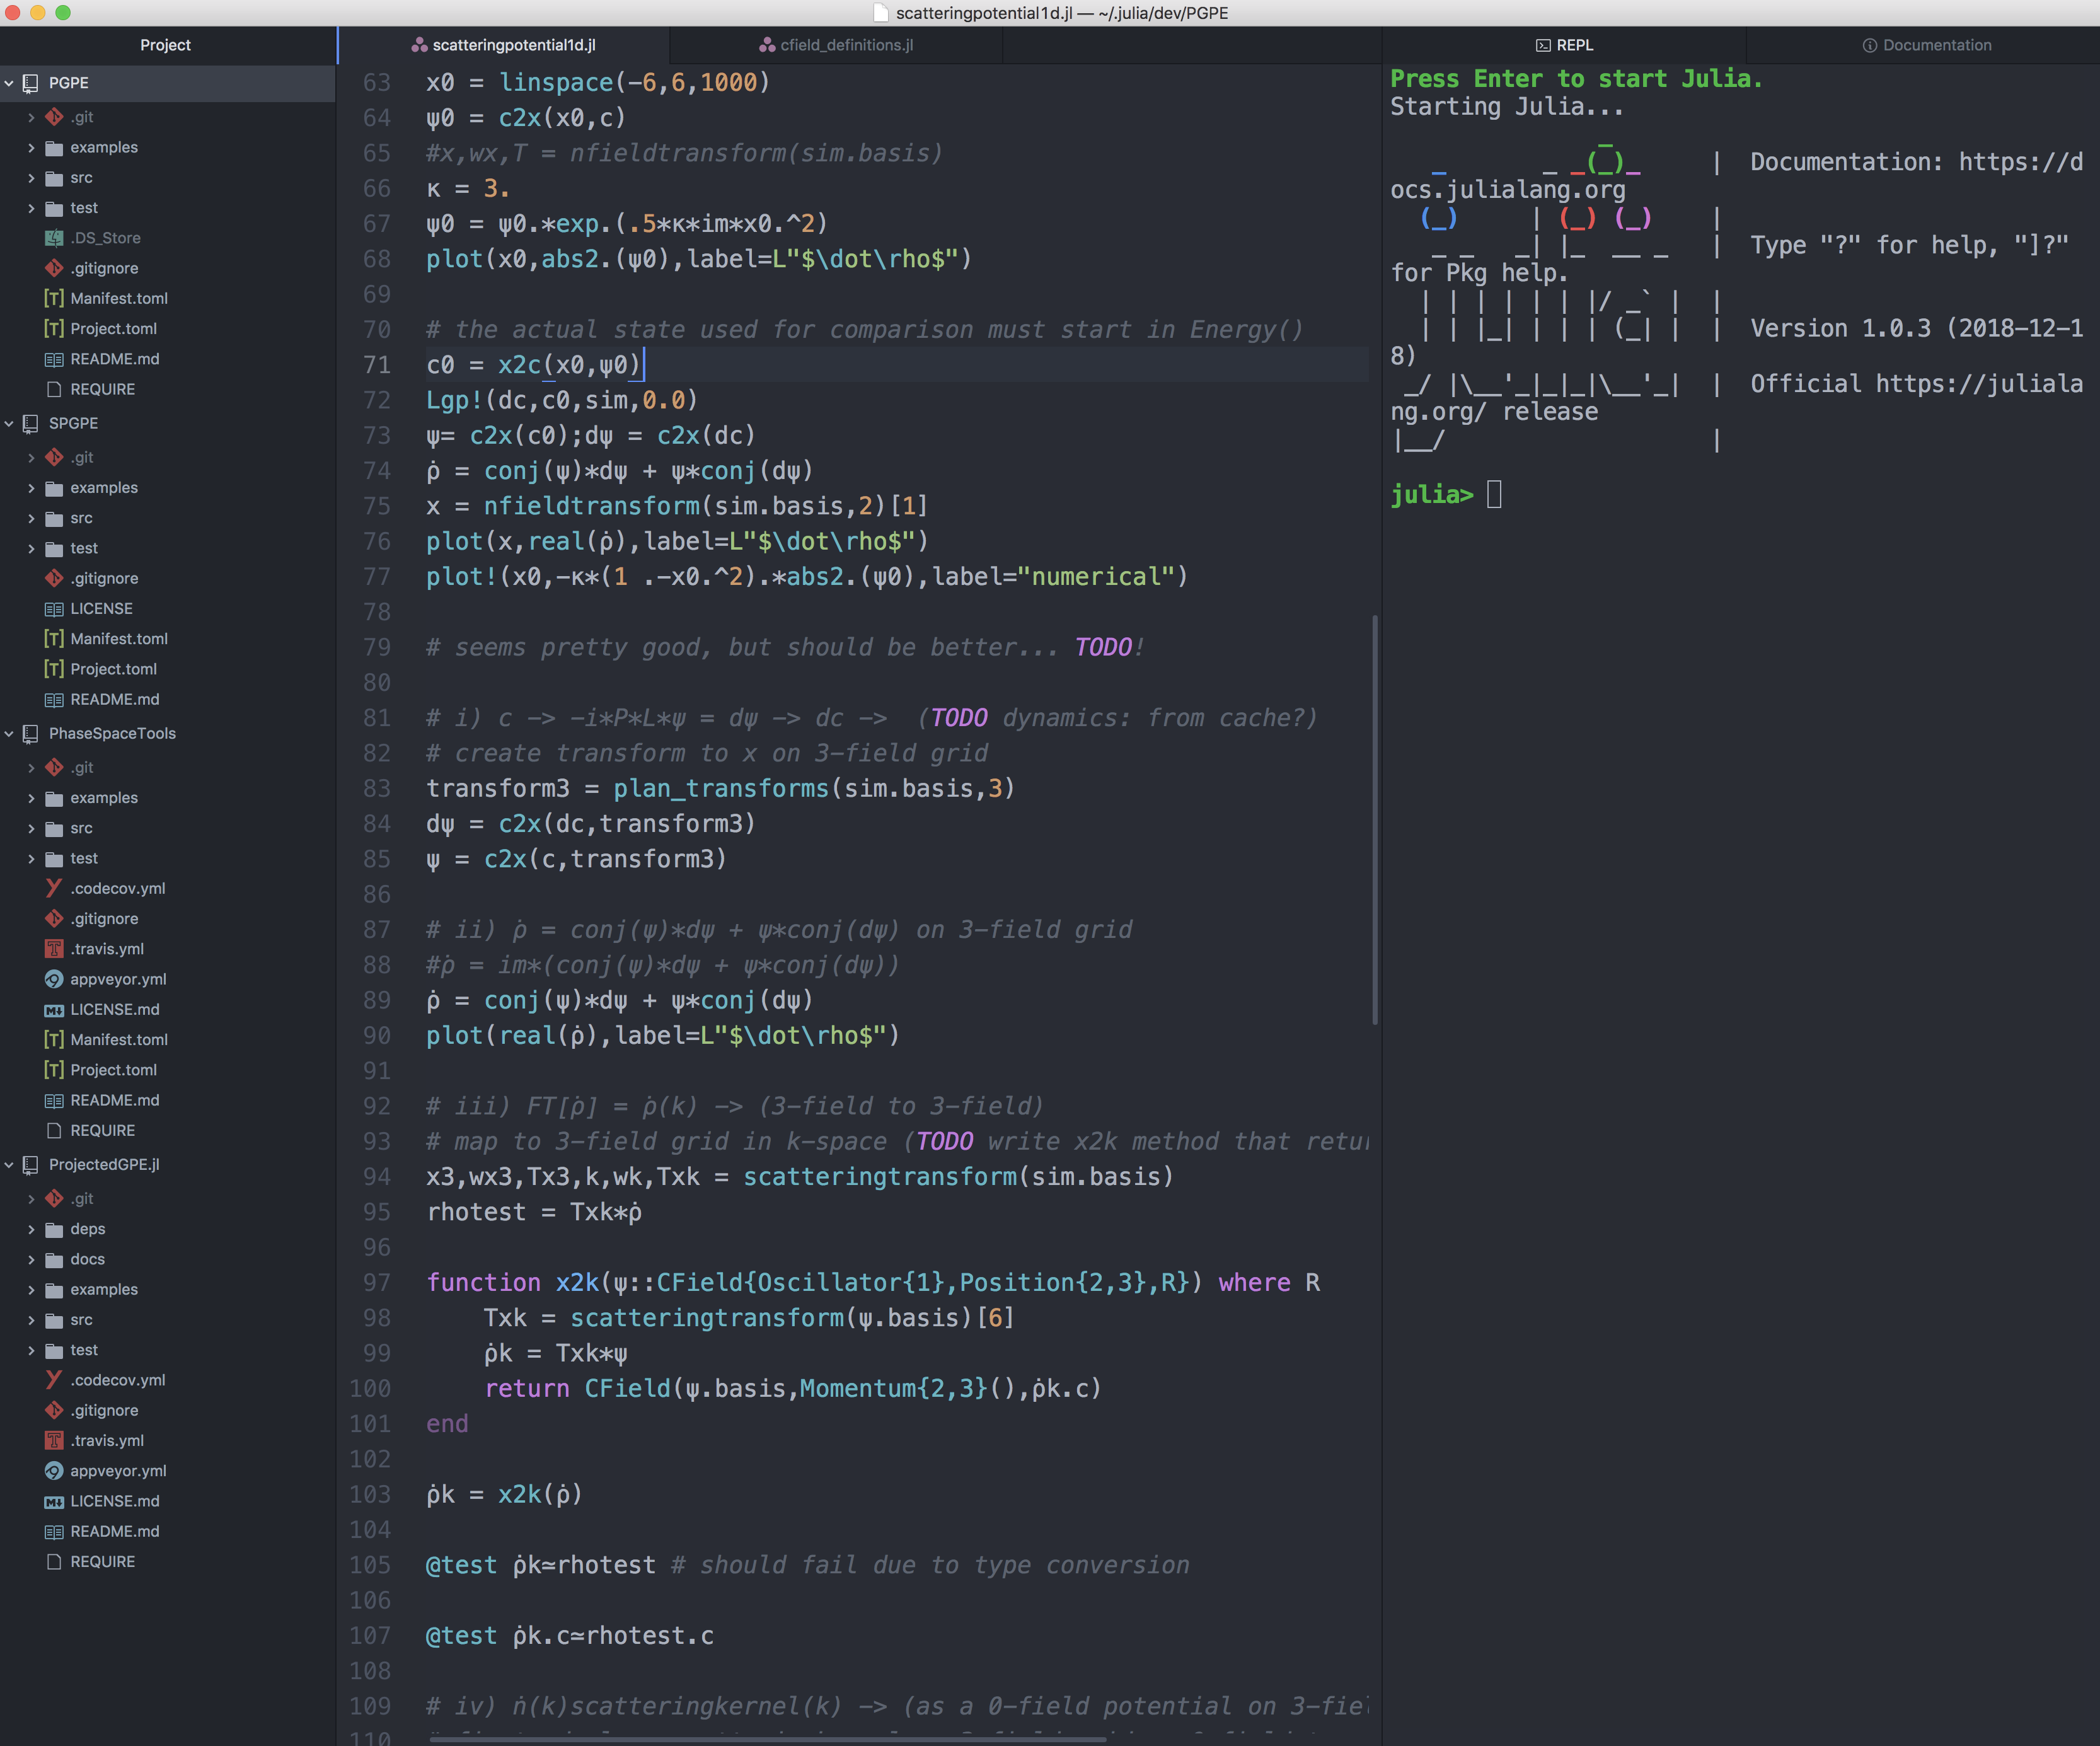

# Wiener process
The _Wiener process_ $W(t)$, depending continuously on $t\in[0,T]$, has the following defining properties:
1. $W(0)=0$ (with probability 1).
2. For $0\leq s<t\leq T$ the random variable given by the increment $W(t)-W(0)$ is normally distributed with mean zero and variance $t-s$. 
3. For $0\leq s<t<u<v\leq T$ the increments $W(t)-W(s)$ and $W(v)-W(u)$ are independent. 

Property 2 is the statement that the Wiener process can be described by a normal random variable:

>$W(t)-W(s)\sim \sqrt{t-s}N(0,1)$, where $N(0,1)$ is a scaled Gaussian random variable with mean zero and unit variance. In $\julia$ this is `randn()`.

Property 3 is the statement that the Wiener process is a _Markov process_ (memoryless).

The Wiener process is often referred to as simply ___Brownian motion___ since it is the fundamental process governing Brownian motion as derived by Einstein, with diffusion coefficient $D\equiv 1$.

# Computational Wiener process
On a computer we always deal with discretizations. The discretized Brownian motion is equivalent to a set of samples from `randn()` 

In [31]:
using Statistics, Plots, LaTeXStrings, Revise

In [32]:
linspace(a,b,n) =  LinRange(a,b,n) |> collect #linspace is worth having

linspace (generic function with 1 method)

In [33]:
randn() # part of base julia

-0.15576694771410482

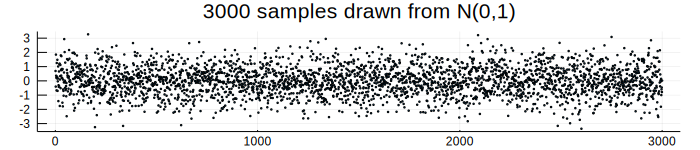

In [36]:
N = 3000
x = randn(N)
n = 1:N |> collect # convert a range object to a vector
plot(n,x,seriestype=:scatter,ms=.5,size=(700,150),legend=false)
title!("$N samples drawn from N(0,1)")

In [37]:
mean(x),var(x) # from the Statistics package

(-0.0022218780973613994, 1.0013163383855523)

In [38]:
T = 1; N = 500; dt = T/N
t = linspace(0,T,N+1)
W = zeros(N)
dW = sqrt(dt)*randn(N); #all independent

In [39]:
mean(dW), var(dW), dt, length(t)

(0.002032889505669678, 0.002105510896759314, 0.002, 501)

We single the initial condition out as a special point with index $j=0$, and use the discretized definition

$ W_j\equiv W_{j-1} + dW_j$

with $j=1,2,..., N$. This choice is consistent with julia's "1-indexing" of arrays.

In [40]:
W[1] = dW[1] 
for j in 2:N 
    W[j] = W[j-1] + dW[j]
end
W = [0.0; W]; # careful here! - in jupyter we can do out of order execution

In [41]:
mean(W), length(W)

(0.8883954131962927, 501)

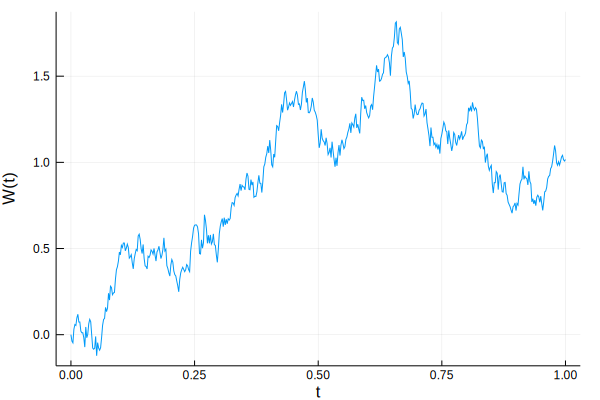

In [42]:
dt = T/N
plot(t,W,legend=false)
xlabel!("t");ylabel!("W(t)")

Let's deal with the sampling and initial condition inside a single function that samples one path, for `N` steps. 

We can also easily add a short documentation string to explain the function. This gives an example of documentation conventions and notation.

In [43]:
"""
`t,dW,W = wienerpath(N,T)`

Sample a path of the Wiener process over time interval `[0,T]` for `N` increments `dW` and initial condition `W(t=0)=W[1]=0.0`. 

Outputs:

- `t` time vector, of length `N+1`
- `dW` vector of increments, of length `N`
- `W` vector of `W[j]` at time points `t=t_j` with `j=1,2,...,N` corresponding to increments. The initial value is included, giving a vector of length `N+1`.
"""
function wienerpath(N,T)
    dt = T/N
    t = 0:dt:T |> collect
    dW = sqrt(dt)*randn(N)
    W = cumsum(dW)
    W = [0.0;W]
    return t,dW,W
end

wienerpath

The function is now part of our current julia session, and the documentation is also part of julia:

In [44]:
?wienerpath

search: wienerpath



`t,dW,W = wienerpath(N,T)`

Sample a path of the Wiener process over time interval `[0,T]` for `N` increments `dW` and initial condition `W(t=0)=W[1]=0.0`. 

Outputs:

  * `t` time vector, of length `N+1`
  * `dW` vector of increments, of length `N`
  * `W` vector of `W[j]` at time points `t=t_j` with `j=1,2,...,N` corresponding to increments. The initial value is included, giving a vector of length `N+1`.


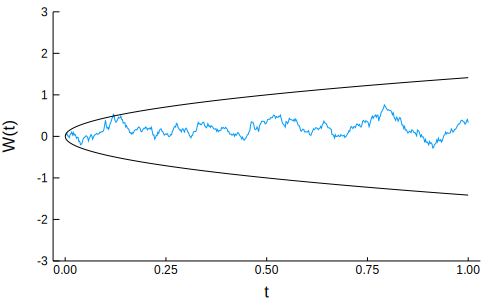

In [42]:
N = 500
t,dW,W = wienerpath(N,1)
p1=plot(t,W,size=(500,300),legend=false,grid=false)
plot!(t,sqrt.(2t),linewidth=1,c=:black)
plot!(t,-sqrt.(2t),linewidth=1,c=:black)
ylims!(-3,3)
xlabel!("t");ylabel!("W(t)")

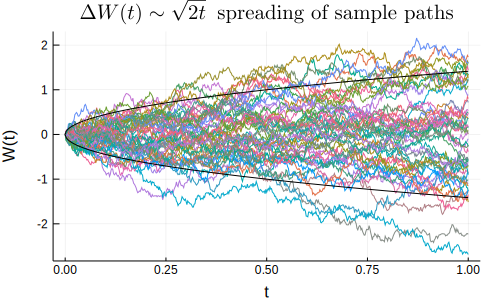

In [35]:
Np = 200
for j = 1:Np
    t,dW,W = wienerpath(N,1)
    plot!(p1,t,W,legend=false)
end
plot!(t,sqrt.(2t),linewidth=1,c=:black)
plot!(t,-sqrt.(2t),linewidth=1,c=:black)
title!(L"\Delta W(t)\sim\sqrt{2t}\;\; \textrm{spreading of sample paths}")

Make a simple animated `gif` in `Plots.jl`

In [43]:
anim = @animate for i=1:150
t,dW,W = wienerpath(N,1)
plot!(p1,t,W)
end

gif(anim,"wpaths.gif", fps = 12)

┌ Info: Saved animation to 
│   fn = /Users/abradley/Dropbox/Julia/ANZSUP2019/wpaths.gif
└ @ Plots /Users/abradley/.julia/packages/Plots/qh1wV/src/animation.jl:90


Plots.AnimatedGif("/Users/abradley/Dropbox/Julia/ANZSUP2019/wpaths.gif")

# FPE solution for Brownian motion

The diffusion equation

$$\frac{\partial p(x,t|0,0)}{\partial t}=\frac{1}{2}\frac{\partial^2p(x,t|0,0)}{\partial x^2}$$

with ideally localized initial condition $p(x,t=0|0,0) = n\delta(x)$ has solution

$$p(x,t|0,0)=\frac{n}{\sqrt{2\pi t}}e^{-x^2/2t}$$

In [79]:
p(x,t) = exp(-x^2/(2t))/sqrt(2π*t) #scalar definition

p (generic function with 1 method)

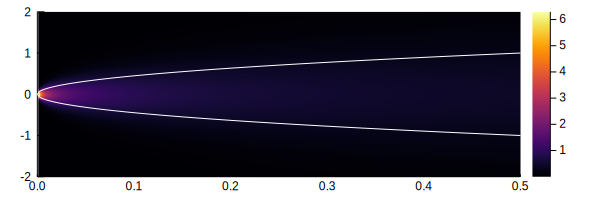

In [80]:
y = linspace(-2,2,500)
heatmap(t,y,p.(y,t'),size=(600,200),transpose=false) # broadcast
plot!(t,sqrt.(2t),linewidth=1,c=:white,legend=false)
plot!(t,-sqrt.(2t),linewidth=1,c=:white)
xlims!(0,.5);ylims!(-2,2)

┌ Warning: rainbow is found in more than one library: misc, colorcet. Choosing misc
└ @ PlotUtils /Users/abradley/.julia/packages/PlotUtils/vsfDO/src/color_gradients.jl:40


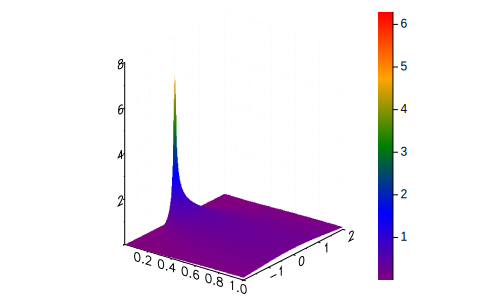

In [81]:
# another plot example
p1=surface(t,y,p.(y,t'),color = :rainbow)
plot!(p1, camera=(40, 40),grid=true)

We can graph the sample average for a set of sample paths of the Wiener process. 

- We show the average, and a few sample paths, of the function $f(t)=e^{t+W(t)/2}$. 
- The known analytic result for the mean is $\langle f(t)\rangle =e^{9t/8}$.

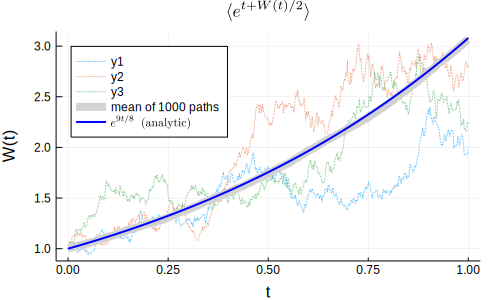

In [82]:
T = 1; N = 500; dt = T/N 
t = linspace(0,T,N+1)
Np = 1000
dW = sqrt(dt)*randn(N,Np)
W = cumsum(dW,dims=1)
W = [zeros(1,Np); W]
U = @. exp(t + 0.5*W) # broadcast (!!)
Ū = mean(U,dims=2) # path average at each time
plot(t,U[:,1:3],s=:dot,size=(500,300)) # show a few paths
plot!(t,Ū,w=8,c=:lightgrey,label="mean of $Np paths",legend=:topleft)
plot!(t,exp.(9t/8),w=2,c=:blue,label=L"e^{9t/8}\;\;\textrm{(analytic)}")
xlabel!("t");ylabel!("W(t)")
title!(L"\langle e^{t+W(t)/2}\rangle")